In [1]:
from utils import *
# from MySolution_13 import MyClassifier, MyClustering, MyLabelSelection, MyFeatureSelection

%load_ext autoreload
%autoreload 2

Synthetic data shape:  (1000, 2) (1000,)


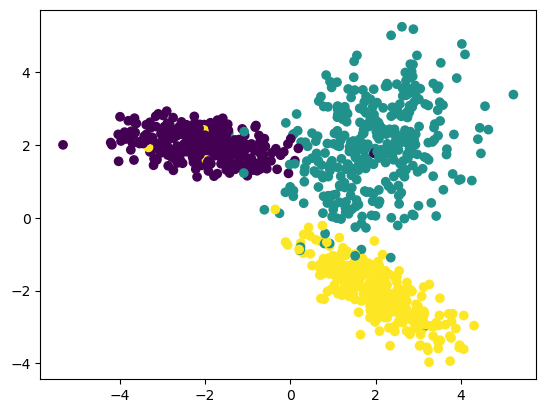

In [2]:
# Get datasets
syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)

plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])

MNIST data shape:  (1000, 784) (1000,)


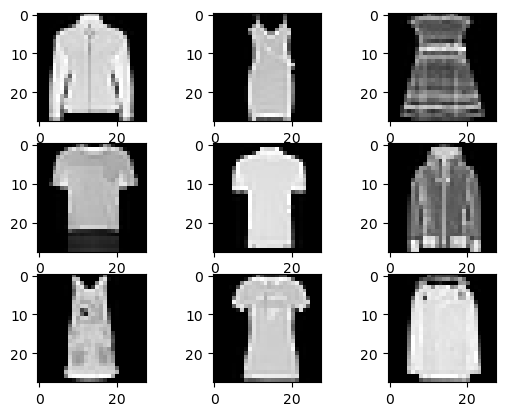

In [3]:
mnist_data = prepare_mnist_data()
print("MNIST data shape: ", mnist_data['trainX'].shape, mnist_data['trainY'].shape)

for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][i].reshape(28,28), cmap='gray')
plt.show()

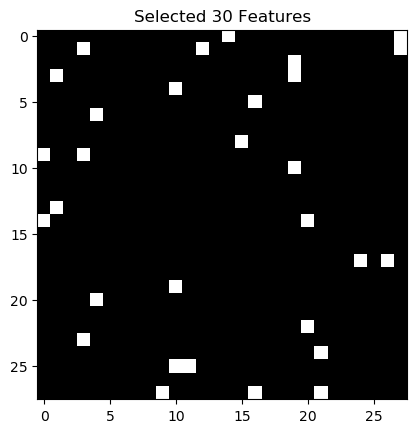

In [4]:
import numpy as np

data = prepare_mnist_data()

# randomly choose 30 features
np.random.seed(0)
selected_features = np.random.choice(data['trainX'].shape[1], 30, replace=False)
data['trainX'] = data['trainX'][:, selected_features]
data['testX'] = data['testX'][:, selected_features]

visualize_features(selected_features)

In [5]:
import Task1

In [18]:
# Task 1
syn_classifier = Task1.MyClassifier(3)
syn_classifier.train(syn_data['trainX'], syn_data['trainY'])
mnist_classifier = Task1.MyClassifier(3)
mnist_classifier.train(mnist_data['trainX'], mnist_data['trainY'])
result1 = {'synthetic_test_accuracy':syn_classifier.evaluate(syn_data['testX'], syn_data['testY']),
           'mnist_test_accuracy':mnist_classifier.evaluate(mnist_data['testX'], mnist_data['testY'])}

Optimal value:0.5000000007962496
Optimal value:0.187888827972156
predY.shape (500, 3)
predY.shape (500, 3)


In [27]:
# Task 2
result2 = {
    'synthetic': {
        'K': [3, 6, 12],
        'clustering_nmi': [],
        'classification_accuracy': [],
    },
    'mnist': {
        'K': [16, 32, 64],
        'clustering_nmi': [],
        'classification_accuracy': []
    },
}

for k1, k2 in zip(result2['synthetic']['K'], result2['mnist']['K']):
    print(f"synthetic dataset with K = {k1}")
    syn_clustering = Task1.MyClustering(k1)
    syn_clustering.train(syn_data['trainX'])
    syn_nmi = syn_clustering.evaluate_clustering(syn_data['trainY'].astype(np.int32))
    syn_acc = syn_clustering.evaluate_classification(syn_data['trainY'].astype(np.int32), syn_data['testX'].astype(np.int32), syn_data['testY'].astype(np.int32))
    result2['synthetic']['clustering_nmi'].append(syn_nmi)
    result2['synthetic']['classification_accuracy'].append(syn_acc)

    print(f"mnist dataset with K = {k2}")
    mnist_clustering = Task1.MyClustering(k2)
    mnist_clustering.train(mnist_data['trainX'])
    mnist_nmi = mnist_clustering.evaluate_clustering(mnist_data['trainY'].astype(np.int32))
    mnist_acc = mnist_clustering.evaluate_classification(mnist_data['trainY'].astype(np.int32), mnist_data['testX'].astype(np.int32), mnist_data['testY'].astype(np.int32))
    result2['mnist']['clustering_nmi'].append(mnist_nmi)
    result2['mnist']['classification_accuracy'].append(mnist_acc)

synthetic dataset with K = 3
mnist dataset with K = 16
synthetic dataset with K = 6
mnist dataset with K = 32
synthetic dataset with K = 12
mnist dataset with K = 64


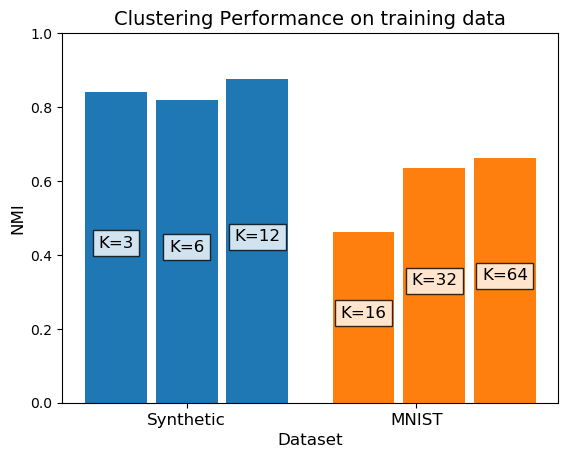

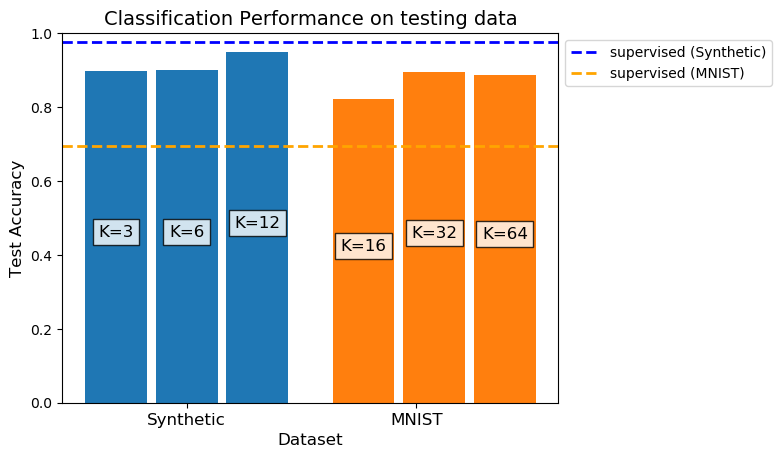

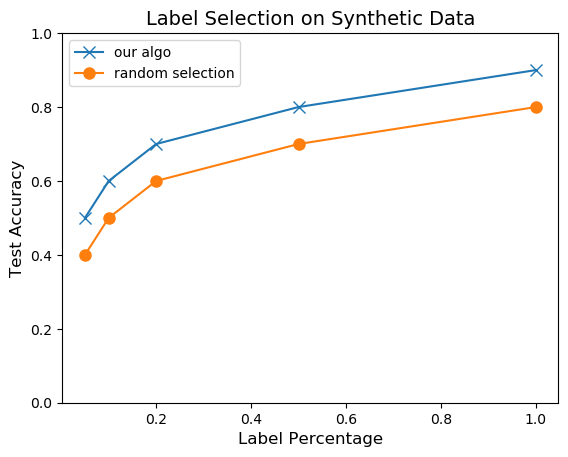

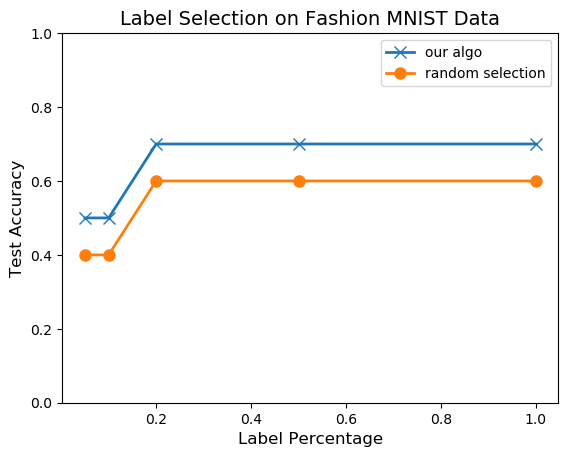

In [31]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)


# Task 3
# only include the plots for the option of task 3 you chosen in the report                    
result3_1 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
            'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}

result3_2 = {'feature_number':[5, 20, 80, 320, 784], 'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'classifier_accuracy(random)':[0.4,0.4,0.6,0.6,0.6], 
                                                'clustering_accuracy(our algo)':[0.35,0.35,0.45,0.55,0.6], 'clustering_accuracy(random)':[0.3,0.3,0.4,0.5,0.6], 
                                                'nmi(our algo)':[0.35,0.4,0.45,0.5,0.5], 'nmi(random)':[0.3,0.35,0.4,0.5,0.5]}


plot_result(result1 = result1, result2 = result2, result3_1 = result3_1)

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)